In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

### Случайный лес

Попробуем обучить модель случайного леса и сравним полученные результаты с моделью линейной регрессии:

In [83]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

Возьмём тестовую выборку из 800 наблюдений и разобъём выборки на обучающую и тестовую (всего около 1100 наблюдений):

In [84]:
itog_dataset = pd.read_csv(r"C:\Users\Мой ПК\Dropbox\Мой ПК (LAPTOP-TOID7NG7)\Desktop\2 курс\AD\проект\itog_dataset.csv")

In [85]:
k = 800 

X = itog_dataset[['WTI','Brent','Usd_Rub','Природный газ','Количество заболевших COVID-19, чел.','Euro_Rub']][:k]
y = itog_dataset['Суммарная капитализация'][:k]
X2 = itog_dataset[['WTI','Brent','Usd_Rub','Природный газ','Количество заболевших COVID-19, чел.','Euro_Rub']][k:]
y2 = itog_dataset['Суммарная капитализация'][k:]

Создадим и обучим модель, получим предсказание значений итоговой переменной на тестовой выборке.
Значения параметров модели подбирались так, чтобы увеличить точность предсказаний модели

In [86]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=1000,  oob_score=True) 
regressor.fit(X, y)

a = regressor.predict(X2) # предсказание

Рассчитаем основные метрики для нашей модели:

In [87]:
from sklearn import metrics

# MAE  по тестовой выборке
print('MAE:', metrics.mean_absolute_error(y2, a) )

# MSE  по тестовой выборке
print('MSE:', metrics.mean_squared_error(y2, a) )

# Стандартное отклонение  по тестовой выборке
print('Станд. отклонение:', np.sqrt(metrics.mean_squared_error(y2, a)) )

# R^2
print('R^2:',regressor.score(X, y))

# попробую сунуть в R^2 тестовую выборку
print('R^2 по тестовой выборке:', regressor.score(X2, y2))

# oob score
print('OOB-score:', regressor.oob_score_)

MAE: 1863.5636401187373
MSE: 5469372.411471147
Станд. отклонение: 2338.6689401176786
R^2: 0.9951689941986586
R^2 по тестовой выборке: -0.8825136933360764
OOB-score: 0.9618941610586078


Построим графики и сравним предсказания модели с реальными данными:

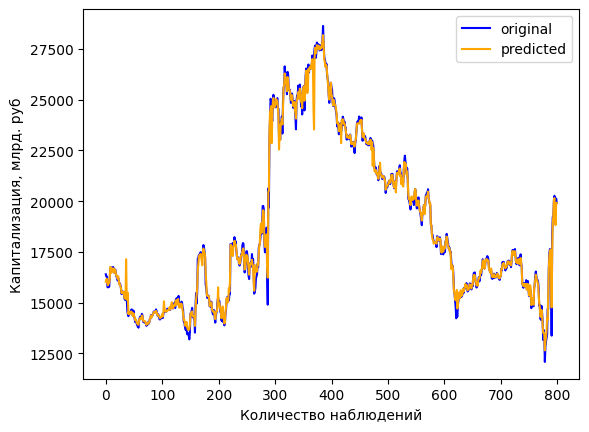

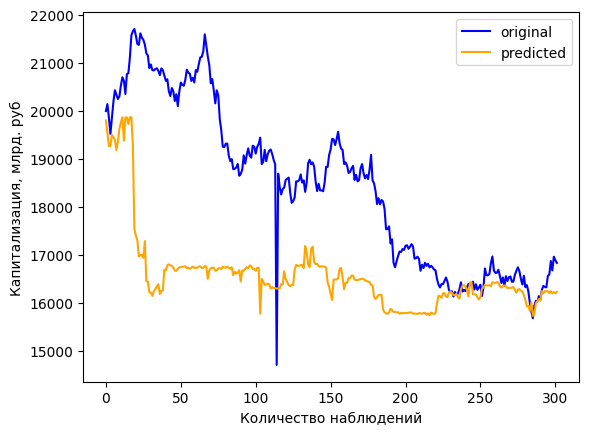

In [88]:
x_ax = range(len(y))
plt.plot(x_ax, y, 'b', label = 'original')
plt.plot(x_ax, regressor.predict(X), 'orange', label = 'predicted')
plt.xlabel('Количество наблюдений')
plt.ylabel('Капитализация, млрд. руб')
plt.legend()
plt.show()

x_ax = range(len(y2))
plt.plot(x_ax, y2, 'b', label="original")
plt.plot(x_ax, a, 'orange', label="predicted")
plt.xlabel('Количество наблюдений')
plt.ylabel('Капитализация, млрд. руб')
plt.legend()
plt.show()


Наша модель показывает выдающиеся резльтаты на обучающей выборке, она просто напросто переобучена (верхний график). Как можно заметить из метрик и графика, качество предсказаний крайне слабая даже при использовании большого количества деревьев

**Более точной оказалась модель, не принимающая во внимание данные по количеству заболевших и курсу евро:**

In [89]:
X = itog_dataset[['WTI','Brent','Usd_Rub','Природный газ']][:k]
y = itog_dataset['Суммарная капитализация'][:k]
X2 = itog_dataset[['WTI','Brent','Usd_Rub','Природный газ']][k:]
y2 = itog_dataset['Суммарная капитализация'][k:]

Обучаем модель и подбираем параметры для большей точности:

In [90]:
regressor = RandomForestRegressor(n_estimators=95, random_state=100,  oob_score=True) 
regressor.fit(X, y)

a = regressor.predict(X2) # предсказание

Метрики:

In [91]:
# MAE
print('MAE:', metrics.mean_absolute_error(y2, a) )

# MSE
print('MSE:', metrics.mean_squared_error(y2, a) )

# Стандартное отклонение
print('Станд. отклонение:', np.sqrt(metrics.mean_squared_error(y2, a)) )

# R^2
print('R^2:',regressor.score(X, y))

# попробую сунуть в R^2 тестовую выборку
print('R^2 по тестовой выборке:', regressor.score(X2, y2))

# oob score
print('OOB-score:', regressor.oob_score_)

MAE: 1176.7804254983625
MSE: 2085920.0694551456
Станд. отклонение: 1444.2714666762429
R^2: 0.9896510042045588
R^2 по тестовой выборке: 0.2820432037653784
OOB-score: 0.922285403228142


Графики:

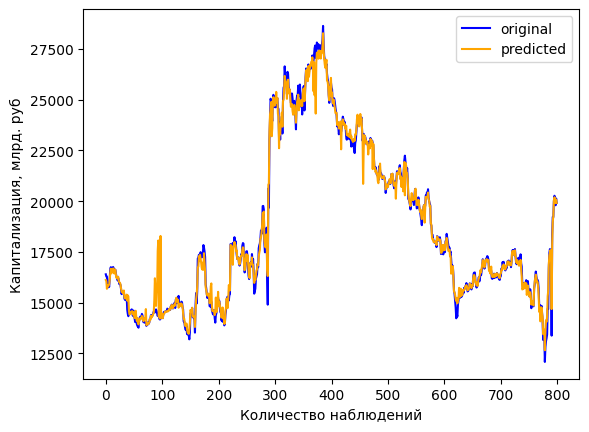

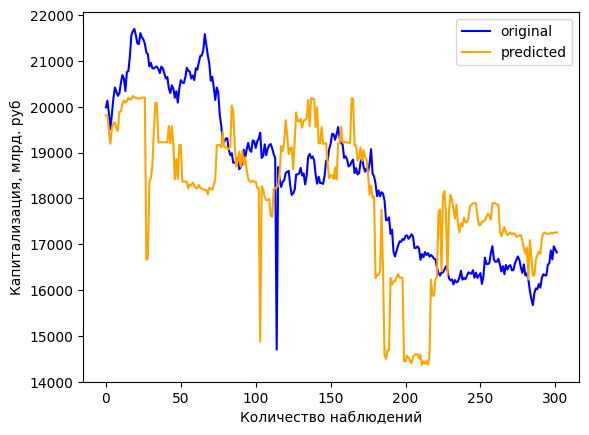

In [92]:
x_ax = range(len(y))
plt.plot(x_ax, y, 'b', label = 'original')
plt.plot(x_ax, regressor.predict(X), 'orange', label = 'predicted')
plt.xlabel('Количество наблюдений')
plt.ylabel('Капитализация, млрд. руб')
plt.legend()
plt.show()

x_ax = range(len(y2))
plt.plot(x_ax, y2, 'b', label="original")
plt.plot(x_ax, a, 'orange', label="predicted")
plt.xlabel('Количество наблюдений')
plt.ylabel('Капитализация, млрд. руб')
plt.legend()
plt.show()

Нам удалось построить модель, значение R^2 для которой равно 0.28, однако качество такой модели всё еще достаточно низкое. Это может быть связано с тем, что количество наблюдений очень мало для применения случайного леса, и характер самих данных также может плохо подходить модели

### Бустинг

Также мы попробовали использовать ещё одну модель - XGBRegressor

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
import xgboost
from xgboost import XGBRegressor

Снова возьмём обучающую выборку:

In [94]:
k = 800 

X = itog_dataset[['WTI','Brent','Usd_Rub','Природный газ','Количество заболевших COVID-19, чел.','Euro_Rub']][:k]
y = itog_dataset['Суммарная капитализация'][:k]
X2 = itog_dataset[['WTI','Brent','Usd_Rub','Природный газ','Количество заболевших COVID-19, чел.','Euro_Rub']][k:]
y2 = itog_dataset['Суммарная капитализация'][k:]

Создаём и обучаем модель:

In [95]:
regressor = make_pipeline(StandardScaler(), XGBRegressor(oob_score=True))

regressor.fit(X, y)

a = regressor.predict(X2) # предсказание

[15:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "oob_score" } are not used.



Метрики:

In [96]:
# MAE
print('MAE:', metrics.mean_absolute_error(y2, a) )

# MSE
print('MSE:', metrics.mean_squared_error(y2, a) )

# Корень из MSE
print('sqrt(MSE):', np.sqrt(metrics.mean_squared_error(y2, a)) )

# R^2
print('R^2:',regressor.score(X, y))

# попробую сунуть в R^2 тестовую выборку
print('R^2 по тестовой выборке:', regressor.score(X2, y2))

MAE: 1484.4686396681145
MSE: 3048531.264359887
sqrt(MSE): 1746.0043712316092
R^2: 0.9998435689846188
R^2 по тестовой выборке: -0.04927977434562458


Графики:

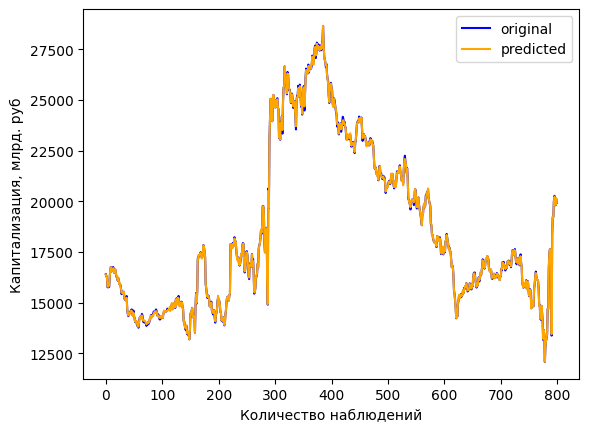

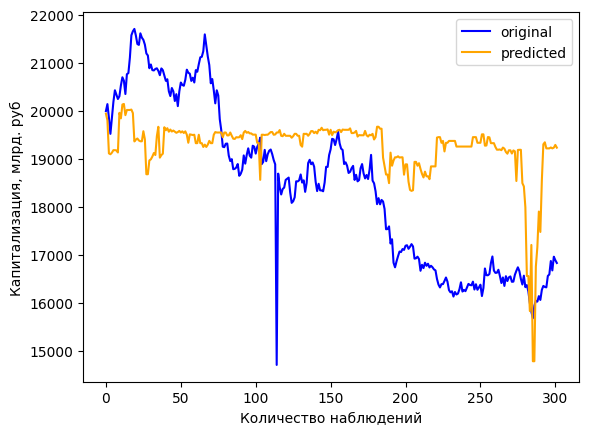

In [97]:
x_ax = range(len(y))
plt.plot(x_ax, y, 'b', label = 'original')
plt.plot(x_ax, regressor.predict(X), 'orange', label = 'predicted')
plt.xlabel('Количество наблюдений')
plt.ylabel('Капитализация, млрд. руб')
plt.legend()
plt.show()

x_ax = range(len(y2))
plt.plot(x_ax, y2, 'b', label="original")
plt.plot(x_ax, a, 'orange', label="predicted")
plt.xlabel('Количество наблюдений')
plt.ylabel('Капитализация, млрд. руб')
plt.legend()
plt.show()

R^2 снова отрицательный, качество предсказаний модели крайне низкое

Вывод: на нишей выборке из 1102 наблюдений лучше всего себя показывает линейная регресиия